In [227]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations

#df=pd.read_csv(r"C:\\Users\\Pranjal\Desktop\data\KAG_conversion_data.csv")
#df.head(50)

In [228]:
df=pd.read_csv(r"C:\\Users\\Pranjal\Desktop\data\KAG_conversion_data.csv")
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [229]:
df.info

<bound method DataFrame.info of         ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  


In [230]:
df.ad_id.nunique()

1143

In [231]:
df.xyz_campaign_id.nunique()

3

In [232]:
df.fb_campaign_id.nunique()

691

In [233]:
df.interest.nunique()

40

In [234]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


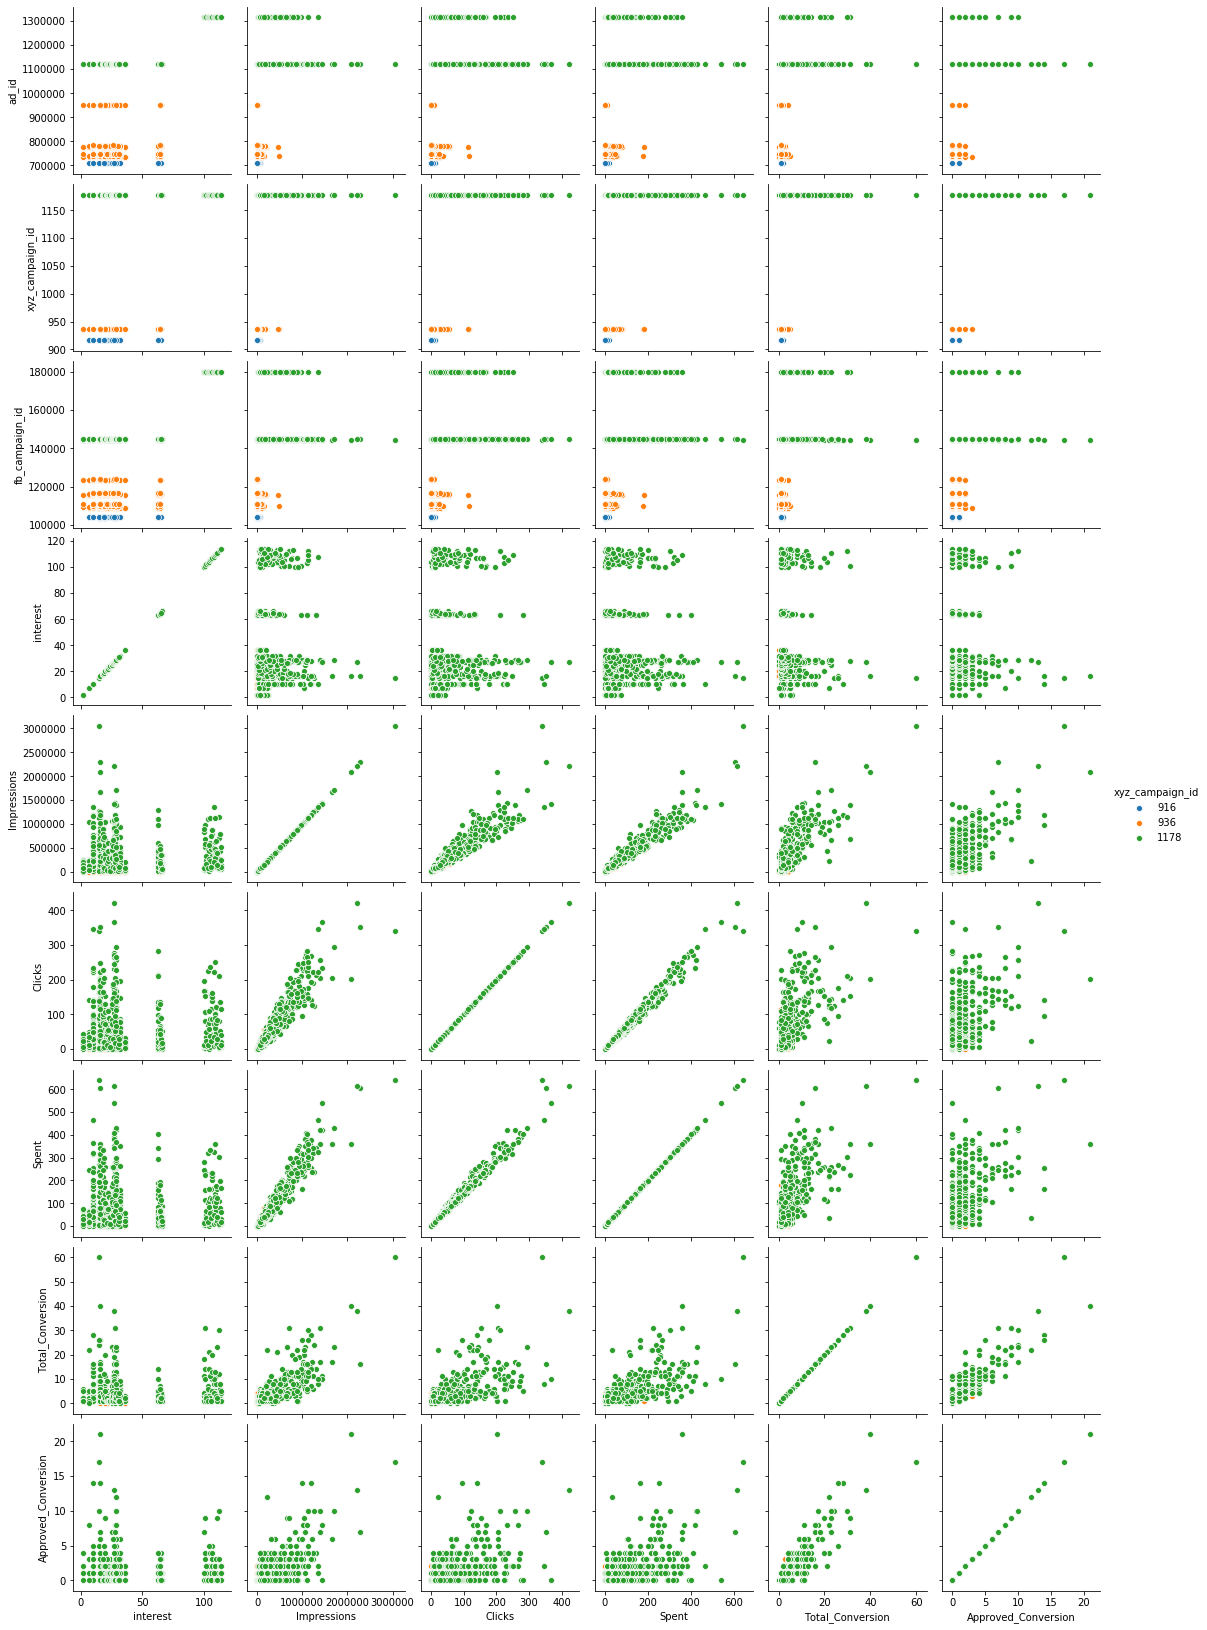

In [235]:
sns.pairplot(data=df,
    y_vars=['ad_id','xyz_campaign_id','fb_campaign_id','interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'],
    x_vars=['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'] , hue='xyz_campaign_id')

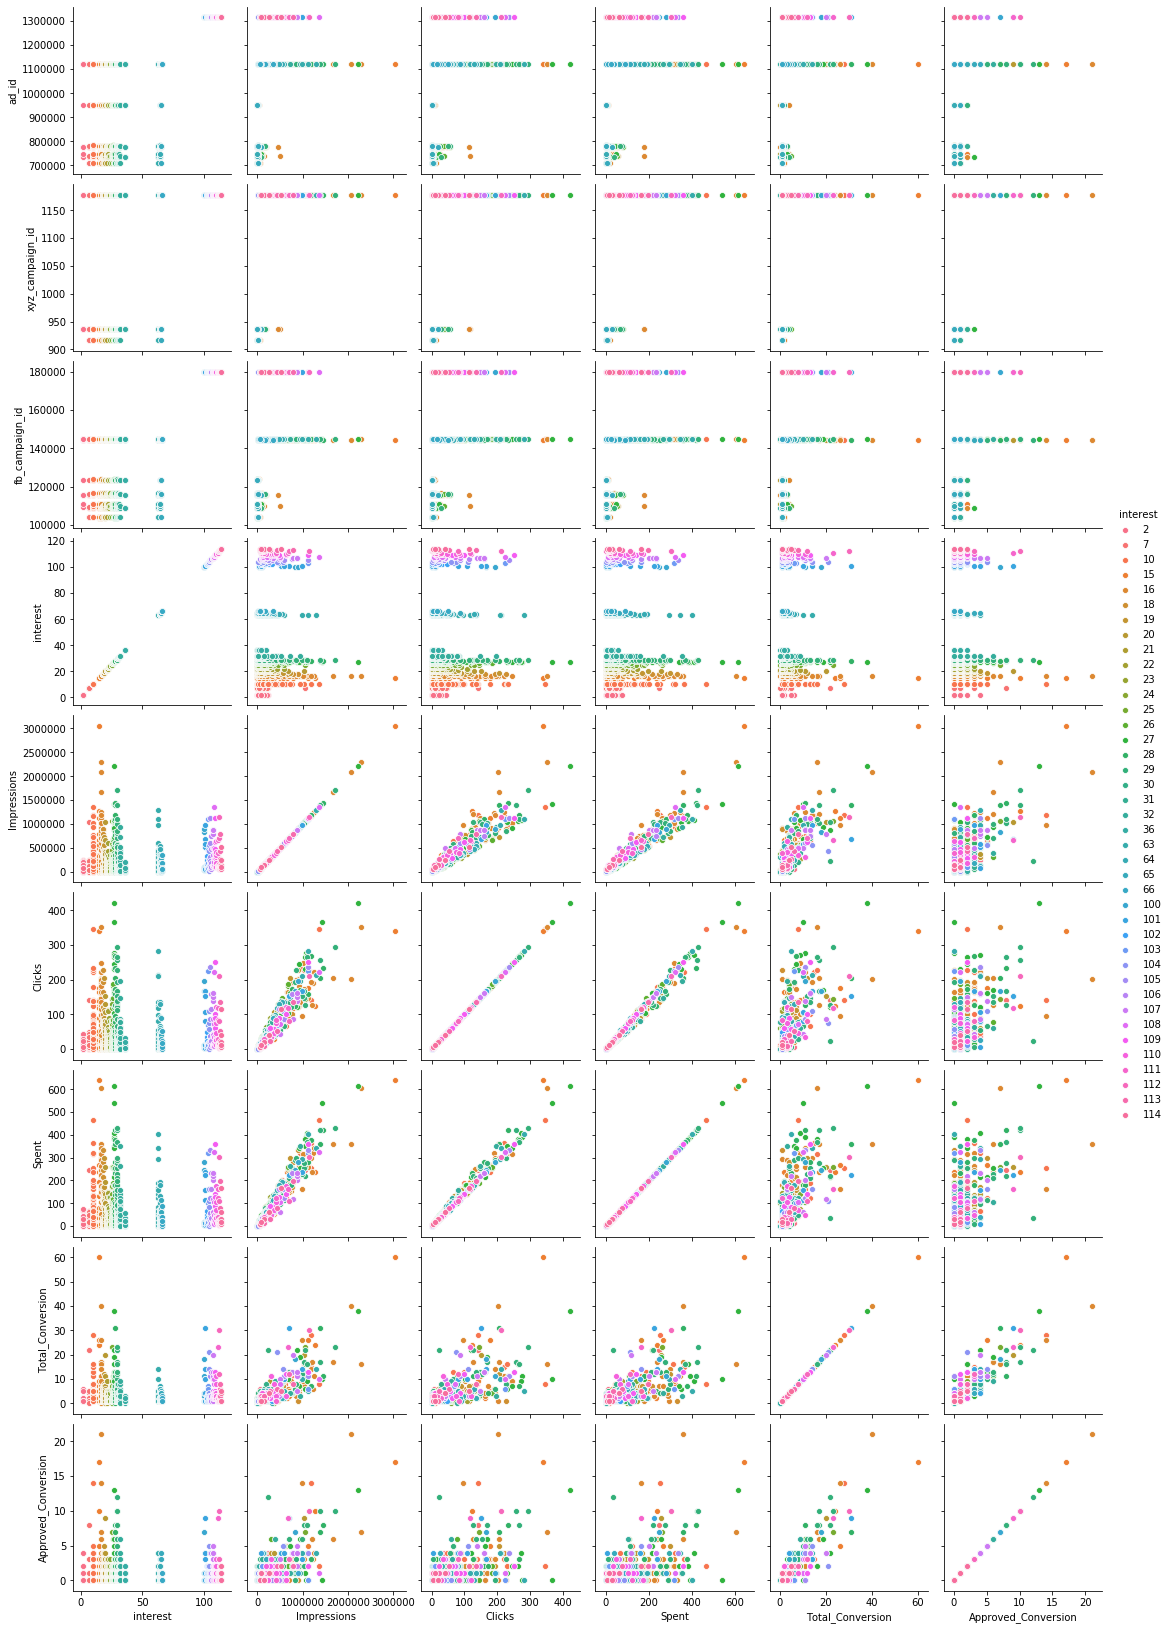

In [236]:
sns.pairplot(data=df,
    y_vars=['ad_id','xyz_campaign_id','fb_campaign_id','interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'],
    x_vars=['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'] , hue='interest')

In [237]:
df['success']=[1 if x>=1 else 0 for x in df['Approved_Conversion']]
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,1
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,1


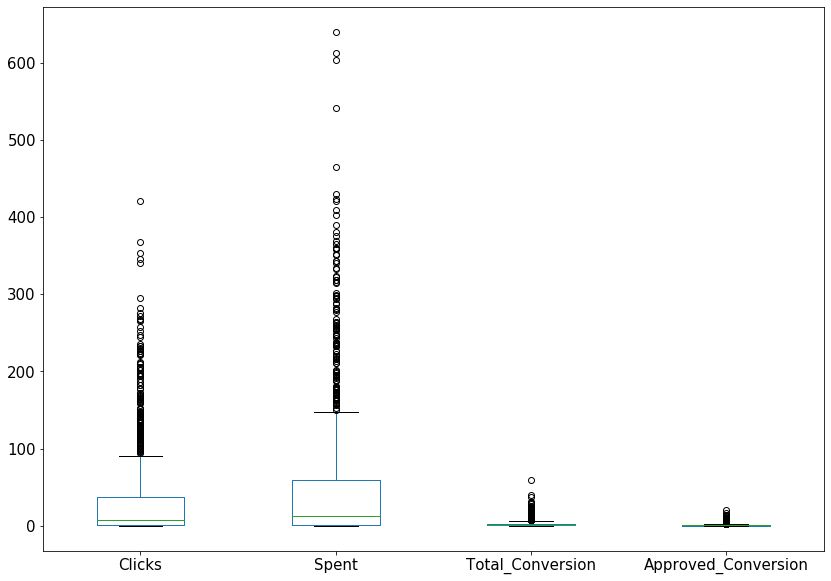

In [238]:
df.iloc[:,7:-1].boxplot(grid=False, fontsize=15, figsize=(14,10))

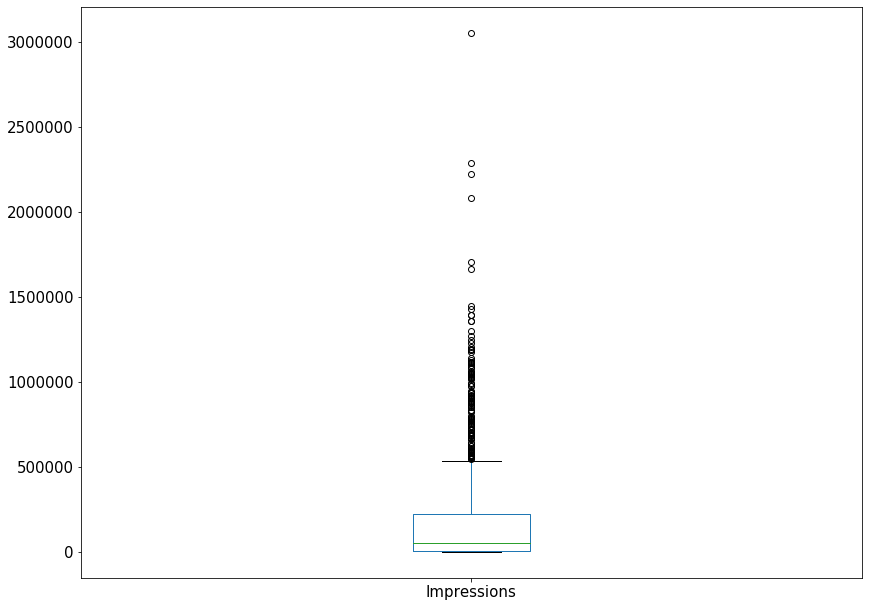

In [239]:
df.iloc[:,6:7].boxplot(grid=False, fontsize=15, figsize=(14,10.5))

In [240]:
df.drop(df.loc[df['Impressions']>2000000].index, inplace=True)
df.drop(df.loc[df['Spent']>500].index, inplace=True)
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,1
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,1


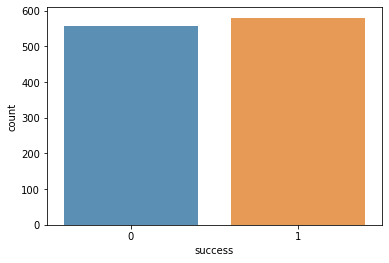

In [241]:
sns.countplot(df['success'], alpha =.80)

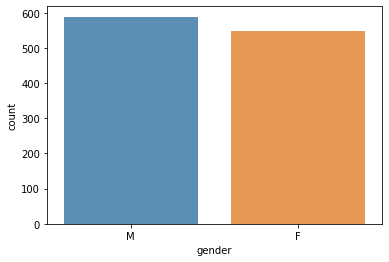

In [242]:
sns.countplot(df['gender'],alpha=.80)

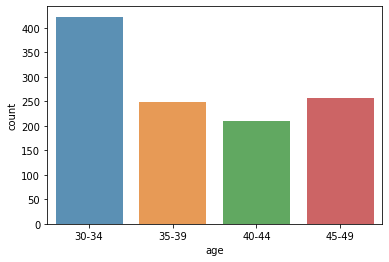

In [243]:
sns.countplot(df['age'],alpha=.80)

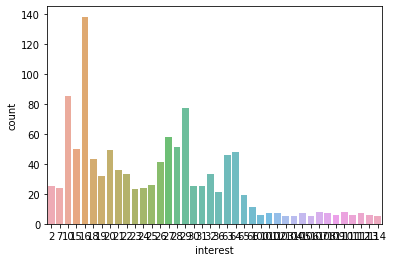

In [244]:
sns.countplot(df['interest'],alpha=.80)

In [245]:
df_gender=df.set_index(['gender','success'])
df_gender

ad_id  xyz_campaign_id  fb_campaign_id    age  interest  \
gender success                                                              
M      1         708746              916          103916  30-34        15   
       0         708749              916          103917  30-34        16   
       0         708771              916          103920  30-34        20   
       0         708815              916          103928  30-34        28   
       1         708818              916          103928  30-34        28   
...                 ...              ...             ...    ...       ...   
F      1        1314410             1178          179977  45-49       109   
       0        1314411             1178          179978  45-49       110   
       0        1314412             1178          179979  45-49       111   
       1        1314414             1178          179981  45-49       113   
       1        1314415             1178          179982  45-49       114   

                Impressions  Clicks       Spent  Total_Conversion  \
gender success                                                      
M      1               7350       1    1.430000                 2   
       0              17861       2    1.820000                 2   
       0                693       0    0.000000                 1   
       0               4259       1    1.250000                 1   
       1               4133       1    1.290000                 1   
...                     ...     ...         ...               ...   
F      1            1129773     252  358.189997                13   
       0             637549     120  173.880003                 3   
       0             151531      28   40.289999                 2   
       1             790253     135  198.710000                 8   
       1             513161     114  165.609999                 5   

                Approved_Conversion  
gender success                       
M      1                          1  
       0                          0  
       0                          0  
       0                          0  
       1                          1  
...                             ...  
F      1                          2  
       0                          0  
       0                          0  
       1                          2  
       1                          2  

[1138 rows x 10 columns]

In [246]:
df_age=df.set_index(['age','success'])
df_age

ad_id  xyz_campaign_id  fb_campaign_id gender  interest  \
age   success                                                              
30-34 1         708746              916          103916      M        15   
      0         708749              916          103917      M        16   
      0         708771              916          103920      M        20   
      0         708815              916          103928      M        28   
      1         708818              916          103928      M        28   
...                ...              ...             ...    ...       ...   
45-49 1        1314410             1178          179977      F       109   
      0        1314411             1178          179978      F       110   
      0        1314412             1178          179979      F       111   
      1        1314414             1178          179981      F       113   
      1        1314415             1178          179982      F       114   

               Impressions  Clicks       Spent  Total_Conversion  \
age   success                                                      
30-34 1               7350       1    1.430000                 2   
      0              17861       2    1.820000                 2   
      0                693       0    0.000000                 1   
      0               4259       1    1.250000                 1   
      1               4133       1    1.290000                 1   
...                    ...     ...         ...               ...   
45-49 1            1129773     252  358.189997                13   
      0             637549     120  173.880003                 3   
      0             151531      28   40.289999                 2   
      1             790253     135  198.710000                 8   
      1             513161     114  165.609999                 5   

               Approved_Conversion  
age   success                       
30-34 1                          1  
      0                          0  
      0                          0  
      0                          0  
      1                          1  
...                            ...  
45-49 1                          2  
      0                          0  
      0                          0  
      1                          2  
      1                          2  

[1138 rows x 10 columns]

In [247]:
df.groupby(['gender']).count()

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
gender,,,,,,,,,,,
F,549,549,549,549,549,549,549,549,549,549,549
M,589,589,589,589,589,589,589,589,589,589,589


In [248]:
df.groupby(['age']).count()

,ad_id,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
age,,,,,,,,,,,
30-34,423,423,423,423,423,423,423,423,423,423,423
35-39,248,248,248,248,248,248,248,248,248,248,248
40-44,210,210,210,210,210,210,210,210,210,210,210
45-49,257,257,257,257,257,257,257,257,257,257,257


In [249]:
bought_gender=df.groupby(['gender']).sum()['success']
bought_gender

gender
F    269
M    311
Name: success, dtype: int64

In [250]:
bought_age=df.groupby(['age']).sum()['success']
bought_age

age
30-34    223
35-39    129
40-44    107
45-49    121
Name: success, dtype: int64

In [251]:
not_gender=df.groupby(['gender']).count()['success']-df.groupby(['gender']).sum()['success']

In [252]:
not_age=df.groupby(['age']).count()['success']-df.groupby(['age']).sum()['success']

In [253]:
print(bought_gender)
print(not_gender)
print(bought_age)
print(not_age)

gender
F    269
M    311
Name: success, dtype: int64
gender
F    280
M    278
Name: success, dtype: int64
age
30-34    223
35-39    129
40-44    107
45-49    121
Name: success, dtype: int64
age
30-34    200
35-39    119
40-44    103
45-49    136
Name: success, dtype: int64


In [254]:
success_gender=pd.concat([bought_gender,not_gender],axis=1,sort=False)
success_gender.columns=['Bought',"Didn't Buy"]
success_gender

,Bought,Didn't Buy
gender,,
F,269,280
M,311,278


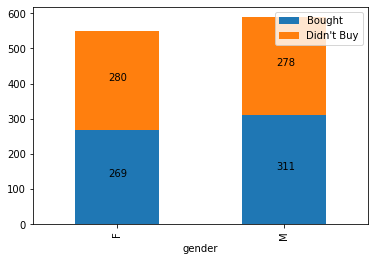

In [255]:
ax=success_gender.plot(kind='bar',stacked=True)
for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.annotate('{:0.0f}'.format(height), (p.get_x()+0.4*width, p.get_y()+0.5*height))

In [256]:
success_age=pd.concat([bought_age,not_age],axis=1,sort=False)
success_age.columns=['Bought',"Didn't Buy"]
success_age

,Bought,Didn't Buy
age,,
30-34,223,200
35-39,129,119
40-44,107,103
45-49,121,136


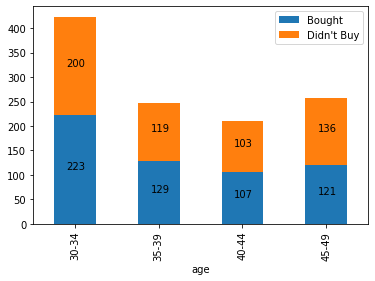

In [257]:
ax = success_age.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:0.0f}'.format(height), (p.get_x()+0.3*width, p.get_y()+0.5*height))


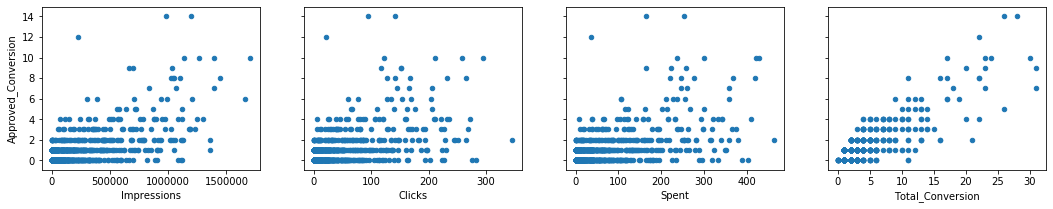

In [258]:
# visualize the relationship with Approved_Conversion using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Impressions', 'Clicks', 'Spent', 'Total_Conversion']):
    df.plot(kind='scatter', x=j, y='Approved_Conversion', ax=axs[i])

plt.show()

In [259]:
# checking for correlation >0.75
correlation = abs(df.corr()) > 0.75
correlation

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
ad_id,True,True,True,False,False,False,False,False,False,False
xyz_campaign_id,True,True,True,False,False,False,False,False,False,False
fb_campaign_id,True,True,True,False,False,False,False,False,False,False
interest,False,False,False,True,False,False,False,False,False,False
Impressions,False,False,False,False,True,True,True,True,False,False
Clicks,False,False,False,False,True,True,True,False,False,False
Spent,False,False,False,False,True,True,True,False,False,False
Total_Conversion,False,False,False,False,True,False,False,True,True,False
Approved_Conversion,False,False,False,False,False,False,False,True,True,False
success,False,False,False,False,False,False,False,False,False,True


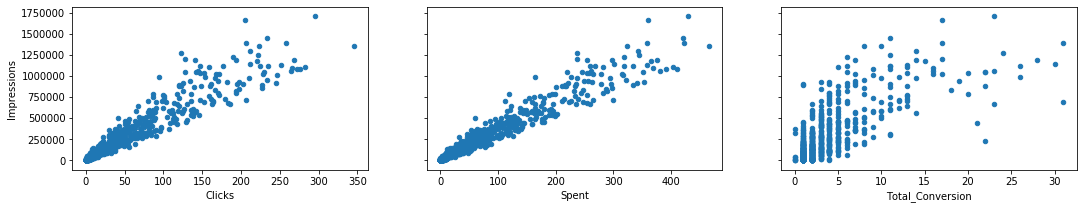

In [260]:
# visualize the relationship with of variables with high correlations
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Clicks', 'Spent', 'Total_Conversion']):
    df.plot(kind='scatter', x=j, y='Impressions', ax=axs[i])

plt.show()


Making Dummy Variable

In [261]:
df.loc[df['xyz_campaign_id'] == 916, 'xyz_campaign_id'] = 'x'
df.loc[df['xyz_campaign_id'] == 936, 'xyz_campaign_id'] = 'y'
df.loc[df['xyz_campaign_id'] == 1178, 'xyz_campaign_id'] = 'z'
df.drop(columns=['ad_id', 'fb_campaign_id'], axis=1, inplace=True)

In [262]:
bins=[0,1,5,10,20,50,100]
labels=['Amount_Purchased_0','Amount_Purchased_1-5','Amount_Purchased_5-10','Amount_Purchased_10-20','Amount_Purchased_20-50','Amount_Purchased_50-100']
df['Amount_Purchased']=pd.cut(df['Approved_Conversion'],bins=bins,labels=labels,right=False)
df=df.drop(columns=['Approved_Conversion'])
df.head()

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,success,Amount_Purchased
0,x,30-34,M,15,7350,1,1.43,2,1,Amount_Purchased_1-5
1,x,30-34,M,16,17861,2,1.82,2,0,Amount_Purchased_0
2,x,30-34,M,20,693,0,0.00,1,0,Amount_Purchased_0
3,x,30-34,M,28,4259,1,1.25,1,0,Amount_Purchased_0
4,x,30-34,M,28,4133,1,1.29,1,1,Amount_Purchased_1-5


In [263]:
bins=[0,1,5,10,20,50,100]
labels=['Amount_Clicked_0','Amount_Clicked_1-5','Amount_Clicked_5-10','Amount_Clicked_10-20','Amount_Clicked_20-50','Amount_Clicked_50-100']
df['Amount_Clicked']=pd.cut(df['Total_Conversion'],bins=bins,labels=labels,right=False)
df=df.drop(columns=['Total_Conversion'])
df.head()

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,success,Amount_Purchased,Amount_Clicked
0,x,30-34,M,15,7350,1,1.43,1,Amount_Purchased_1-5,Amount_Clicked_1-5
1,x,30-34,M,16,17861,2,1.82,0,Amount_Purchased_0,Amount_Clicked_1-5
2,x,30-34,M,20,693,0,0.00,0,Amount_Purchased_0,Amount_Clicked_1-5
3,x,30-34,M,28,4259,1,1.25,0,Amount_Purchased_0,Amount_Clicked_1-5
4,x,30-34,M,28,4133,1,1.29,1,Amount_Purchased_1-5,Amount_Clicked_1-5


In [264]:
df[['interest']].apply(lambda x: x.astype('category')).dtypes

interest    category
dtype: object

In [265]:
xyz_campaign_id=pd.get_dummies(df['xyz_campaign_id'],drop_first=True)
gender=pd.get_dummies(df['gender'],drop_first=True)
interest=pd.get_dummies(df['interest'],drop_first=True)
age=pd.get_dummies(df['age'],drop_first=True)
Amount_Purchased=pd.get_dummies(df['Amount_Purchased'],drop_first=True)
Amount_Clicked=pd.get_dummies(df['Amount_Clicked'],drop_first=True)
df.drop(['xyz_campaign_id','gender','interest','age','Amount_Purchased','Amount_Clicked'],axis=1,inplace=True)
df1=pd.concat([df,xyz_campaign_id,gender,age,interest,Amount_Purchased,Amount_Clicked],axis=1)
df1.columns

Index([            'Impressions',                  'Clicks',
                         'Spent',                 'success',
                             'y',                       'z',
                             'M',                   '35-39',
                         '40-44',                   '45-49',
                               7,                        10,
                              15,                        16,
                              18,                        19,
                              20,                        21,
                              22,                        23,
                              24,                        25,
                              26,                        27,
                              28,                        29,
                              30,                        31,
                              32,                        36,
                              63,                        64,
                        

In [266]:
df1.to_csv("Clean_Data.csv")
df1.head()

,Impressions,Clicks,Spent,success,y,z,M,35-39,40-44,45-49,...,Amount_Purchased_1-5,Amount_Purchased_5-10,Amount_Purchased_10-20,Amount_Purchased_20-50,Amount_Purchased_50-100,Amount_Clicked_1-5,Amount_Clicked_5-10,Amount_Clicked_10-20,Amount_Clicked_20-50,Amount_Clicked_50-100
0,7350,1,1.43,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,17861,2,1.82,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,693,0,0.00,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4259,1,1.25,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4133,1,1.29,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Baseline Model

In [267]:
X=df1.drop('success',axis=1)
y=df1['success']
X.columns=X.columns.map(str)

In [268]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=35)

In [269]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(fit_intercept=False,C=1e12)
logreg.fit(x_train,y_train)
dictionary=dict(zip(list(x_train.columns),list(logreg.coef_[0])))
dictionary

{'Impressions': 2.1377917810185765e-06,
 'Clicks': 5.870524260008465e-11,
 'Spent': 2.100745020172347e-10,
 'y': -2.2159104936069855e-11,
 'z': -4.714960212261036e-12,
 'M': -9.68429166804543e-12,
 '35-39': -2.3703028382295294e-12,
 '40-44': -5.4114296849120555e-12,
 '45-49': -1.3301681525075835e-11,
 '7': -2.0855250454875184e-12,
 '10': 1.3029709036245951e-12,
 '15': -8.688315718813407e-13,
 '16': -4.034953028175747e-12,
 '18': -2.2135020363635605e-13,
 '19': -1.540117862741059e-12,
 '20': -1.1330399171136289e-12,
 '21': 1.9947037307451465e-13,
 '22': -3.4616767425129605e-12,
 '23': -3.279438085293059e-12,
 '24': -6.445782418626128e-13,
 '25': -1.4072853068387907e-12,
 '26': -2.5348688818038746e-12,
 '27': -5.111444121252888e-12,
 '28': -3.639043741432165e-12,
 '29': 2.0614534839818707e-12,
 '30': -8.630240711290824e-13,
 '31': -9.082218615611074e-13,
 '32': 4.818773188859e-13,
 '36': -1.788020168904675e-12,
 '63': -3.1651776027031216e-13,
 '64': -1.58640108495568e-12,
 '65': 1.404463

In [270]:
y_pred_class=logreg.predict(x_test)

In [271]:
from sklearn import metrics
print('Test Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_class))
print('Test F1 score: ',metrics.f1_score(y_test,y_pred_class))

Test Accuracy Score:  0.5131578947368421
Test F1 score:  0.6782608695652175


In [272]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
classes = ['Bought', "Didn't Buy"]

Confusion Matrix, without normalization
[[  0 111]
 [  0 117]]


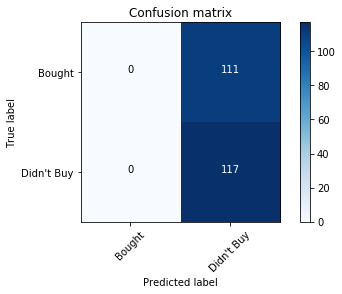

In [273]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [274]:
# create polynomial and interaction terms

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)
column_names = poly.get_feature_names(X.columns)
df_poly= pd.DataFrame(poly.transform(X), columns=column_names)

X_train_base, X_test_base, y_train_base, y_test = train_test_split(df_poly, y, random_state=35,test_size=0.2)

print(poly.get_feature_names(X.columns))

['Impressions', 'Clicks', 'Spent', 'y', 'z', 'M', '35-39', '40-44', '45-49', '7', '10', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '36', '63', '64', '65', '66', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', 'Amount_Purchased_1-5', 'Amount_Purchased_5-10', 'Amount_Purchased_10-20', 'Amount_Purchased_20-50', 'Amount_Purchased_50-100', 'Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20', 'Amount_Clicked_20-50', 'Amount_Clicked_50-100', 'Impressions^2', 'Impressions Clicks', 'Impressions Spent', 'Impressions y', 'Impressions z', 'Impressions M', 'Impressions 35-39', 'Impressions 40-44', 'Impressions 45-49', 'Impressions 7', 'Impressions 10', 'Impressions 15', 'Impressions 16', 'Impressions 18', 'Impressions 19', 'Impressions 20', 'Impressions 21', 'Impressions 22', 'Impressions 23', 'Impressions 24', 'Impressions 25', 'Impressions 26', 'Impressions 27', 'Imp

In [276]:
print(X_train_base.shape, y_train_base.shape)
print(X_test_base.shape, y_test.shape)

(910, 35989) (910,)
(228, 35989) (228,)


SCALING DATA

In [277]:
scaler = StandardScaler()
scaler.fit(X_train_base)
X_train_base =pd.DataFrame(data=scaler.transform(X_train_base), columns=column_names)
X_test_base =pd.DataFrame(data=scaler.transform(X_test_base), columns=column_names)

In [278]:
# running log model with all ~36k features

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_base, y_train_base)
y_pred_base_class = logreg.predict(X_test_base)

In [279]:
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_base_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_base_class))

Test Accuracy score:  0.9780701754385965
Test F1 score:  0.9785407725321887


Confusion Matrix, without normalization
[[109   2]
 [  3 114]]


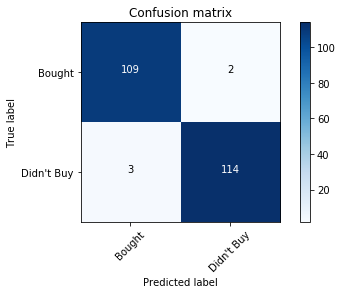

In [280]:
cm = confusion_matrix(y_test, y_pred_base_class)
classes = ['Bought', "Didn't Buy"]
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)